<a href="https://colab.research.google.com/github/LEE-SANG-HYUK/Titanic/blob/main/titanic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno
import warnings
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
for col in train.columns:
  print('column : {:>12}\t count of nan value : {:3d}\t percent of nan value :{:.02f}%'.format(col, train[col].isnull().sum(), train[col].isnull().sum() / train[col].shape[0] * 100))

column :  PassengerId	 count of nan value :   0	 percent of nan value :0.00%
column :     Survived	 count of nan value :   0	 percent of nan value :0.00%
column :       Pclass	 count of nan value :   0	 percent of nan value :0.00%
column :         Name	 count of nan value :   0	 percent of nan value :0.00%
column :          Sex	 count of nan value :   0	 percent of nan value :0.00%
column :          Age	 count of nan value : 177	 percent of nan value :19.87%
column :        SibSp	 count of nan value :   0	 percent of nan value :0.00%
column :        Parch	 count of nan value :   0	 percent of nan value :0.00%
column :       Ticket	 count of nan value :   0	 percent of nan value :0.00%
column :         Fare	 count of nan value :   0	 percent of nan value :0.00%
column :        Cabin	 count of nan value : 687	 percent of nan value :77.10%
column :     Embarked	 count of nan value :   2	 percent of nan value :0.22%


In [9]:
for col in test.columns:
  print('column : {:>12}\t count of nan value : {:3d}\t percent of nan value :{:.02f}%'.format(col, test[col].isnull().sum(), test[col].isnull().sum() / test[col].shape[0] * 100))

column :  PassengerId	 count of nan value :   0	 percent of nan value :0.00%
column :       Pclass	 count of nan value :   0	 percent of nan value :0.00%
column :         Name	 count of nan value :   0	 percent of nan value :0.00%
column :          Sex	 count of nan value :   0	 percent of nan value :0.00%
column :          Age	 count of nan value :  86	 percent of nan value :20.57%
column :        SibSp	 count of nan value :   0	 percent of nan value :0.00%
column :        Parch	 count of nan value :   0	 percent of nan value :0.00%
column :       Ticket	 count of nan value :   0	 percent of nan value :0.00%
column :         Fare	 count of nan value :   1	 percent of nan value :0.24%
column :        Cabin	 count of nan value : 327	 percent of nan value :78.23%
column :     Embarked	 count of nan value :   0	 percent of nan value :0.00%


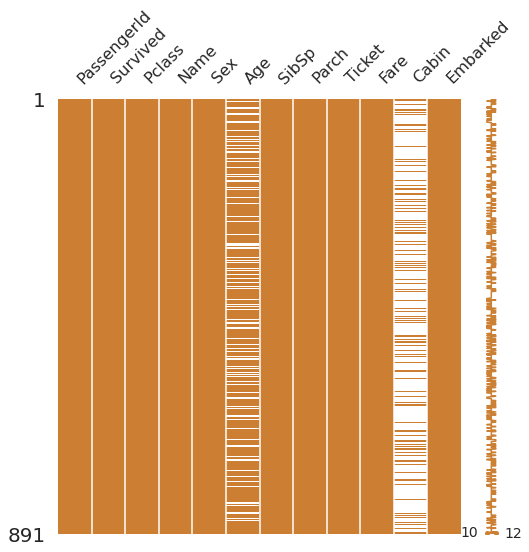

In [10]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

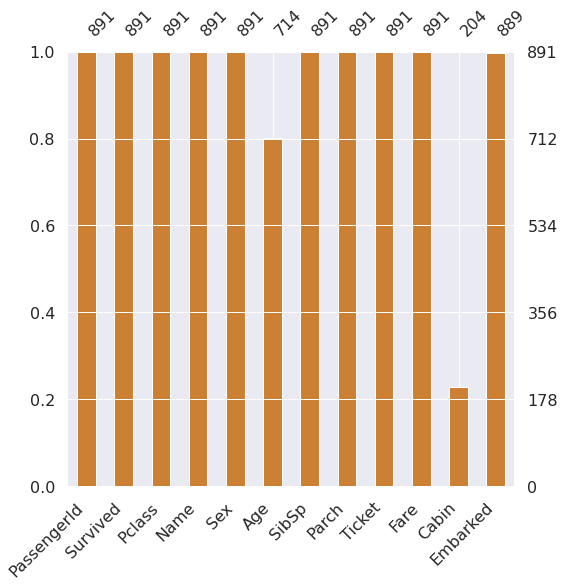

In [11]:
msno.bar(df=train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

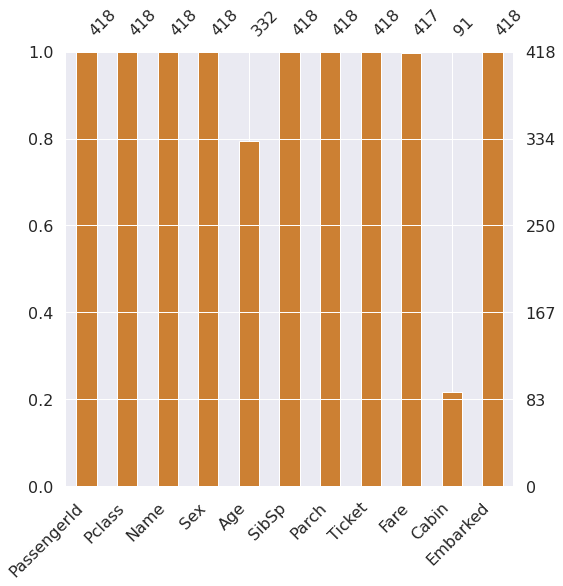

In [12]:
msno.bar(df=test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

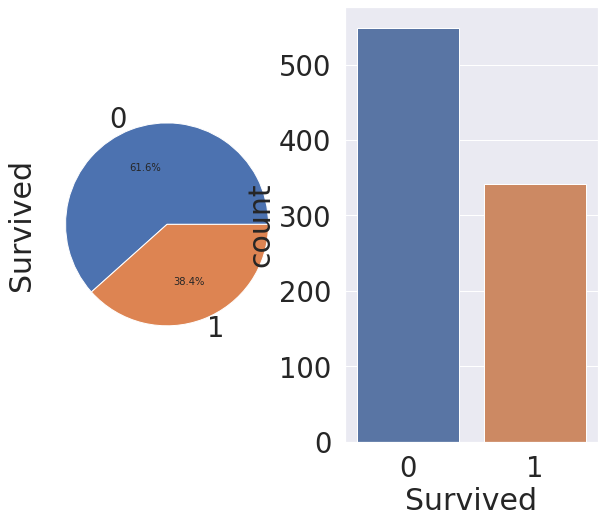

In [13]:
f, ax = plt.subplots(1, 2, figsize=(10, 8))
train['Survived'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0])

sns.countplot('Survived', data=train, ax = ax[1])

In [14]:
print

<function print>

In [15]:
train.groupby(['Pclass']).sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [16]:
 pd.crosstab(train['Pclass'], train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [17]:
train.groupby(['Pclass']).Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

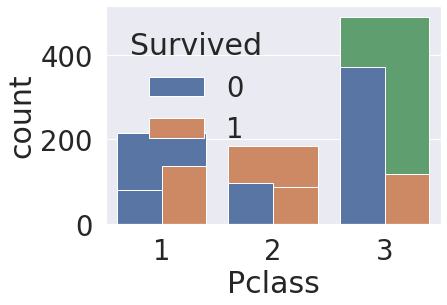

In [18]:
ax = plt.subplot(111)
#train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
sns.countplot('Pclass', data=train)
#ax = plt.subplot(122)
sns.countplot('Pclass', hue='Survived', data=train)
#ax[1].set_ylim([0, 500])

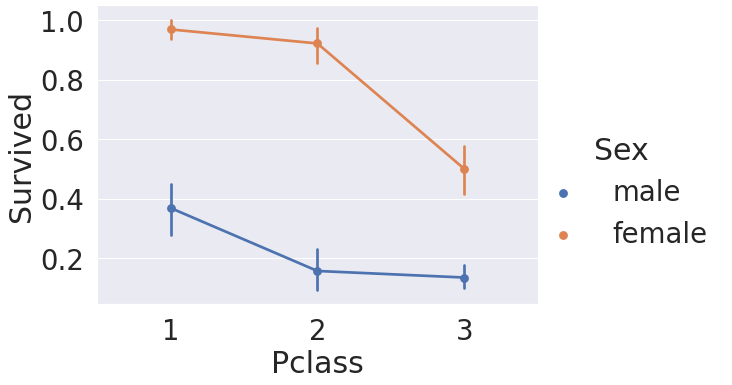

In [19]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train,aspect=1.5)

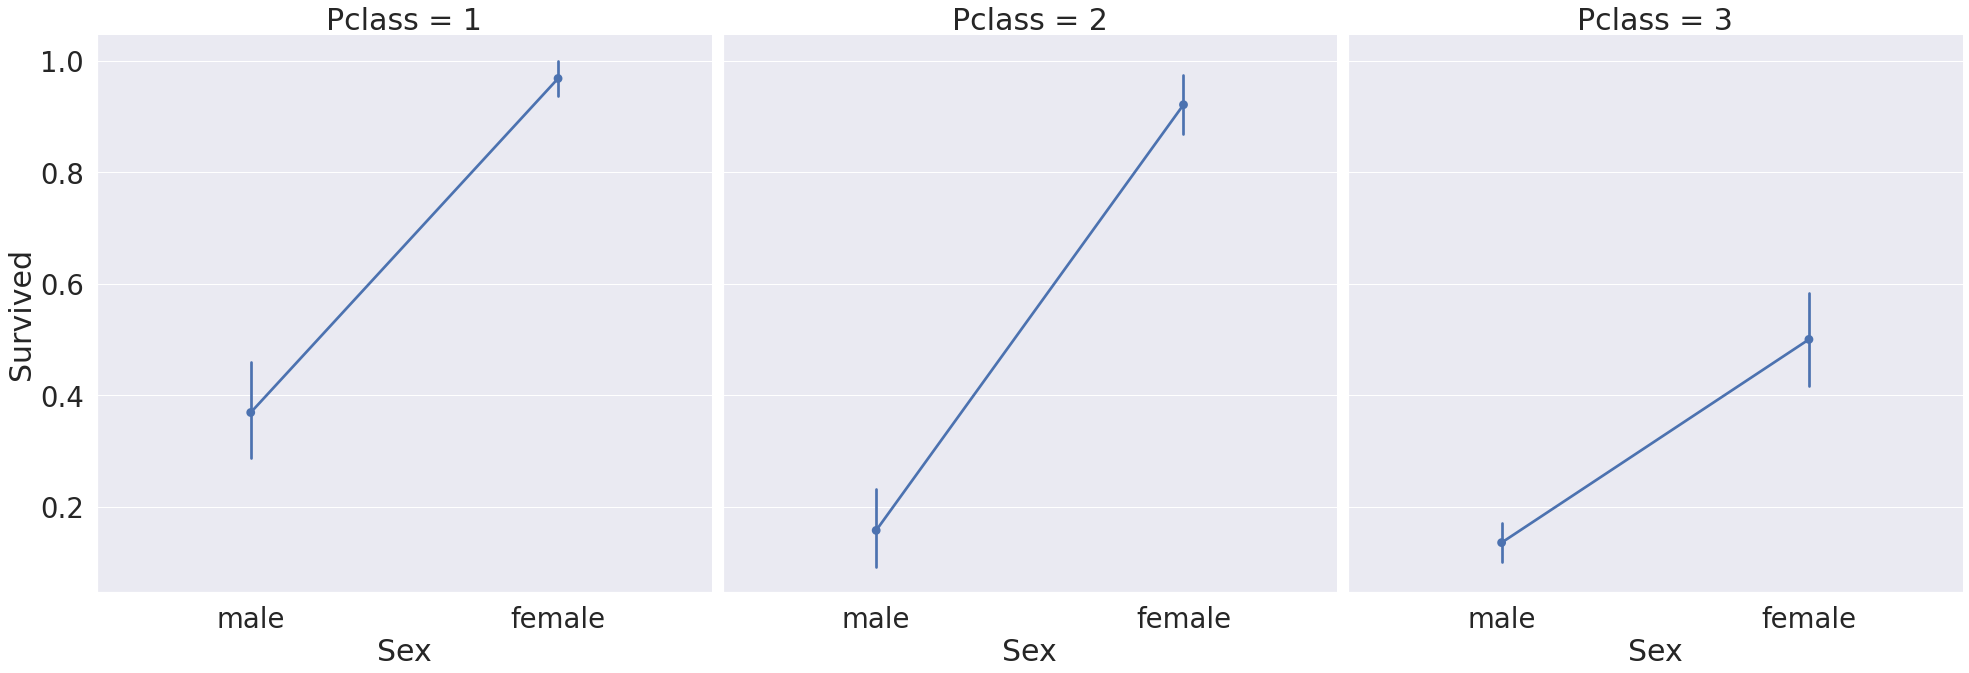

In [20]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=train, satureation=.5,
               size=9, aspect=1
              )

In [21]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


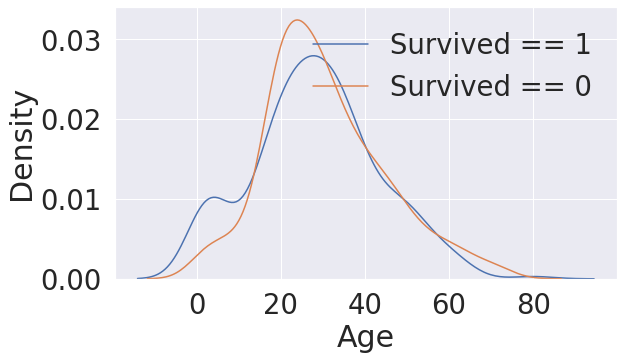

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

Text(0.5, 0, 'Age')

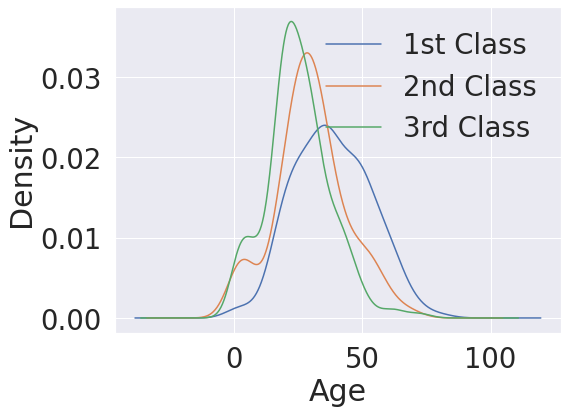

In [23]:
plt.figure(figsize=(8, 6))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.xlabel('Age')

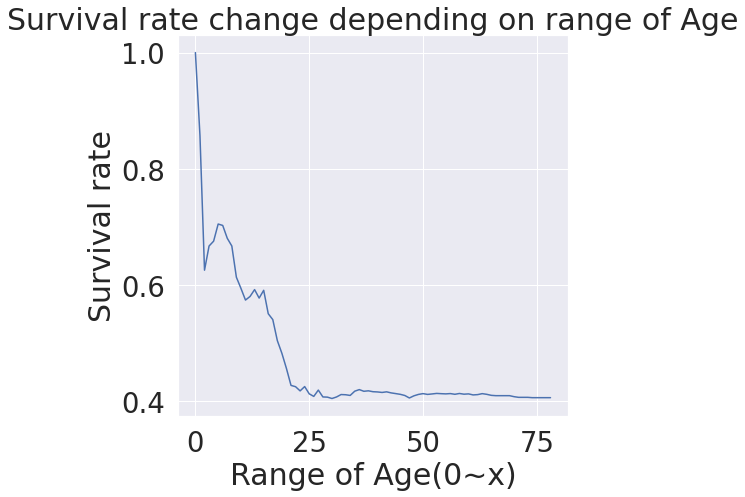

In [24]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / (train[train['Age'] < i]['Survived']).count())

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

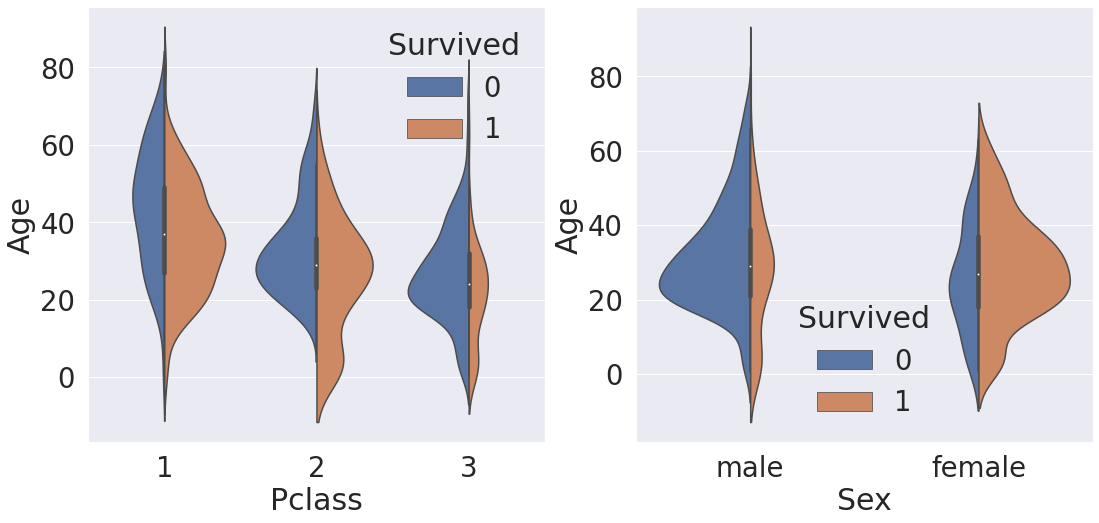

In [25]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train, split=True, scale='count', ax=ax[0])
sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True, scale='count', ax=ax[1])

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
def Age_g(row):
  if row.Age <= 10:
    Age_g = 0
  elif row.Age <= 20.125:
    Age_g = 1
  elif row.Age <= 28:
    Age_g = 2
  elif row.Age <= 38:
    Age_g = 3
  else:
    Age_g = 4
  return Age_g

In [29]:
train['Age_g'] = train.apply(Age_g, axis=1)

In [30]:
def Fare_g(row):
  if row.Fare <= 7.9104:
    Fare_g = 1
  elif row.Fare <= 14.4542:
    Fare_g = 2
  elif row.Fare <= 31:
    Fare_g = 3
  else:
    Fare_g = 4
  return Fare_g

In [31]:
train['Fare_g'] = train.apply(Fare_g, axis=1)

In [32]:
train.Age_g.value_counts()

4    354
2    183
3    175
1    115
0     64
Name: Age_g, dtype: int64

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_g        891 non-null    int64  
 13  Fare_g       891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [34]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [36]:
train['Embarked'] = train['Embarked'].astype('category')
train['Embarked'] = train['Embarked'].cat.codes

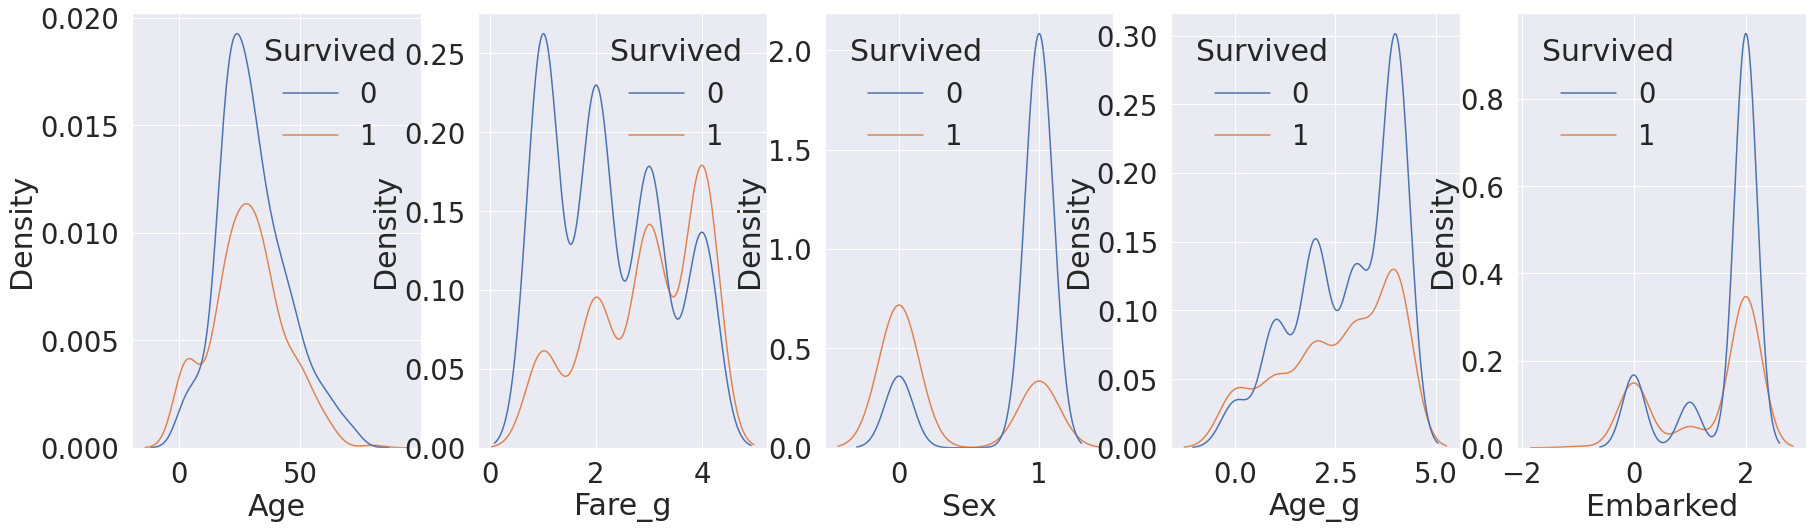

In [37]:
f, ax = plt.subplots(1, 5, figsize=(30, 8))
sns.kdeplot(data = train, x = 'Age', hue='Survived', ax=ax[0])
sns.kdeplot(data = train, x = 'Fare_g', hue='Survived', ax=ax[1])
sns.kdeplot(data = train, x = 'Sex', hue='Survived', ax=ax[2])
sns.kdeplot(data = train, x = 'Age_g', hue='Survived', ax=ax[3])
sns.kdeplot(data = train, x = 'Embarked', hue='Survived', ax=ax[4])

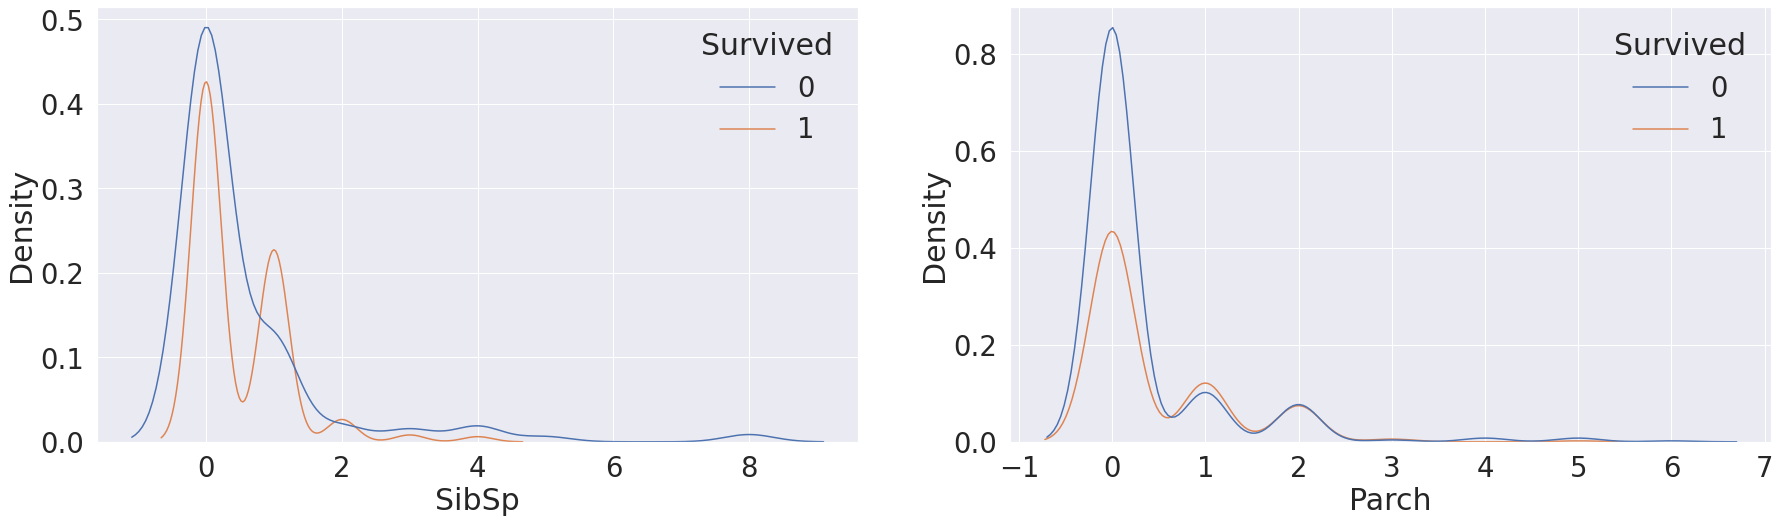

In [42]:
f, ax = plt.subplots(1, 2, figsize=(30, 8))
sns.kdeplot(data = train, x = 'SibSp', hue='Survived', ax=ax[0])
sns.kdeplot(data = train, x = 'Parch', hue='Survived', ax=ax[1])

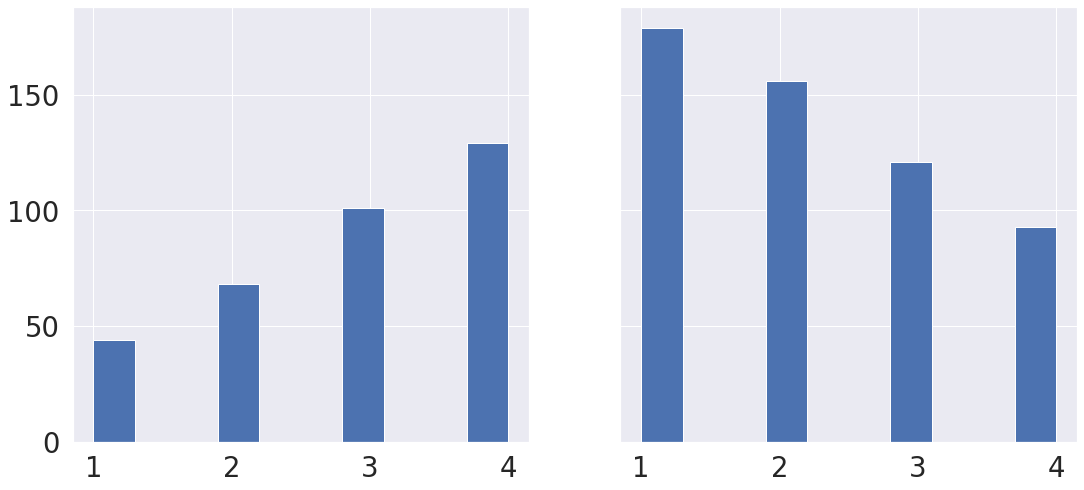

In [43]:
f, ax = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
train[train['Survived']==1].Fare_g.hist(ax=ax[0])
train[train['Survived']==0].Fare_g.hist(ax=ax[1])

In [38]:
for i in range(1, 5):
  print(i, train[(train['Survived']==1) & (train['Fare_g'] == i)].Fare_g.count() / train[train['Fare_g'] == i].Fare_g.count() * 100)
  #print(i, train[train['Fare_g'] == i].Fare_g.count())

1 19.730941704035875
2 30.357142857142854
3 45.4954954954955
4 58.108108108108105


In [39]:
for i in range(1, 4):
  print(i, train[(train['Survived']==1) & (train['Pclass'] == i)].Pclass.count() / train[train['Pclass'] == i].Pclass.count() * 100)
  #print(i, train[train['Fare_g'] == i].Fare_g.count())

1 62.96296296296296
2 47.28260869565217
3 24.236252545824847


In [40]:
for i in range(2):
  print(i, train[(train['Survived']==1) & (train['Sex'] == i)].Sex.count() / train[train['Sex'] == i].Sex.count() * 100)
  #print(i, train[train['Fare_g'] == i].Fare_g.count())

0 74.20382165605095
1 18.890814558058924


In [41]:
for i in range(1, 5):
  print(i, train[(train['Survived']==1) & (train['Age_g'] == i)].Age_g.count() / train[train['Age_g'] == i].Age_g.count() * 100)
  #print(i, train[train['Fare_g'] == i].Fare_g.count())

1 38.26086956521739
2 36.0655737704918
3 43.42857142857143
4 33.33333333333333


In [44]:
age_avg = train['Age'].mean()
age_std = train['Age'].std()
age_null_count = train['Age'].isnull().sum()
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
train['Age'][np.isnan(train['Age'])] = age_null_random_list
train['Age'] = train['Age'].astype(int)

train['CategoricalAge'] = pd.cut(train['Age'], 5)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_g,Fare_g,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,2,2,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,3,4,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,2,2,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2,3,4,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,2,3,2,"(32.0, 48.0]"


In [46]:
train['CategoricalAge'] = train['CategoricalAge'].astype('category')
train['CategoricalAge'] = train['CategoricalAge'].cat.codes

In [47]:
train['CategoricalAge'].value_counts()

1    447
2    254
0    110
3     69
4     11
Name: CategoricalAge, dtype: int64

In [48]:
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived', 'Age', 'Fare', 'CategoricalAge']

In [49]:
#X = StandardScaler().fit_transform(train.drop(columns=drop_cols))
X = train.drop(columns=drop_cols)
y = train['Survived'].values

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_g,Fare_g,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,2,2,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0,3,4,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,2,2,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2,3,4,2
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,2,3,2,2


In [51]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_g,Fare_g
0,3,1,1,0,2,2,1
1,1,0,1,0,0,3,4
2,3,0,0,0,2,2,2
3,1,0,1,0,2,3,4
4,3,1,0,0,2,3,2


In [54]:
X1 = pd.get_dummies(X, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_g', 'Fare_g'])

In [55]:
X1

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_-1,Embarked_0,Embarked_1,Embarked_2,Age_g_0,Age_g_1,Age_g_2,Age_g_3,Age_g_4,Fare_g_1,Fare_g_2,Fare_g_3,Fare_g_4
0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
887,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
888,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
889,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [56]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [78]:
X_train.shape

(668, 7)

In [59]:
from keras.layers import Dense, Activation, Dropout
import tensorflow as tf

In [79]:
model = tf.keras.Sequential()

model.add(Dense(16, activation='relu', input_shape=(7, )))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [80]:
history = model.fit(X_train, y_train, shuffle=True, epochs=200, batch_size=16, validation_split=0.25)

Epoch 1/200
32/32 [==============================] - 1s 7ms/step - loss: 1.9867 - accuracy: 0.4737 - val_loss: 0.7785 - val_accuracy: 0.3413
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 1.1452 - accuracy: 0.5340 - val_loss: 0.6922 - val_accuracy: 0.6587
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8464 - accuracy: 0.5568 - val_loss: 0.6707 - val_accuracy: 0.6587
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8330 - accuracy: 0.5619 - val_loss: 0.6622 - val_accuracy: 0.6587
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7650 - accuracy: 0.5959 - val_loss: 0.6541 - val_accuracy: 0.6587
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7522 - accuracy: 0.5556 - val_loss: 0.6485 - val_accuracy: 0.6587
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7540 - accuracy: 0.5449 - val_loss: 0.6441 - val_accuracy: 0.6587
Epoch 8/200
3

In [81]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7534


[0.5118414163589478, 0.7533632516860962]

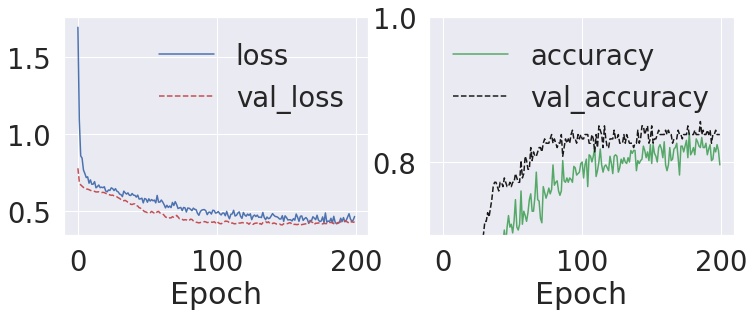

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
forest = RandomForestClassifier()

In [83]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.9101796407185628
0.8071748878923767


In [68]:
import xgboost as xgb

In [88]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)
#xgb_predictions = gbm.predict(X_test)

In [89]:
gbm.score(X_train,y_train)

0.8832335329341318

In [90]:
gbm.score(X_test,y_test)

0.7892376681614349

In [74]:
X_train

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_-1,Embarked_0,Embarked_1,Embarked_2,Age_g_0,Age_g_1,Age_g_2,Age_g_3,Age_g_4,Fare_g_1,Fare_g_2,Fare_g_3,Fare_g_4
35,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
46,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
453,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
291,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
748,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
767,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
72,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
235,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
